In [47]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('retail_store_sales.csv')

In [64]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [69]:
df.shape

(12575, 11)

In [70]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [72]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [73]:
df['Discount Applied'] = df['Discount Applied'].fillna(False)

C:\Users\Guest User\AppData\Local\Temp\ipykernel_38800\1447356179.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Discount Applied'] = df['Discount Applied'].fillna(False)


In [74]:
mean  = df['Total Spent'].mean()
print(mean)
mean_q = df['Quantity'].mean()
mean_q

129.6525770612313


np.float64(5.536379583994654)

In [75]:
df['Total Spent'] = df['Total Spent'].fillna(mean)
df['Quantity'] = df['Quantity'].fillna(mean_q)

In [76]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity               0
Total Spent            0
Payment Method         0
Location               0
Transaction Date       0
Discount Applied       0
dtype: int64

In [77]:
df['Item'].value_counts()

Item
Item_2_BEV      126
Item_25_FUR     113
Item_11_FUR     110
Item_16_MILK    109
Item_1_MILK     109
               ... 
Item_5_BEV        7
Item_13_BEV       7
Item_13_FUR       7
Item_21_PAT       6
Item_3_EHE        5
Name: count, Length: 200, dtype: int64

In [78]:
df["Price Per Unit"] = df["Price Per Unit"].fillna(df["Total Spent"] / df["Quantity"])
df["Quantity"] = df["Quantity"].fillna(df["Total Spent"] / df["Price Per Unit"])

In [79]:
df['Item'] = df.groupby(['Category','Price Per Unit'])['Item'].transform(lambda x: x.ffill().bfill())

In [80]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  float64       
 6   Total Spent       12575 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  12575 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(6)
memory usage: 994.8+ KB


In [82]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12570    False
12571    False
12572    False
12573    False
12574    False
Length: 12575, dtype: bool

<Axes: xlabel='Quantity'>

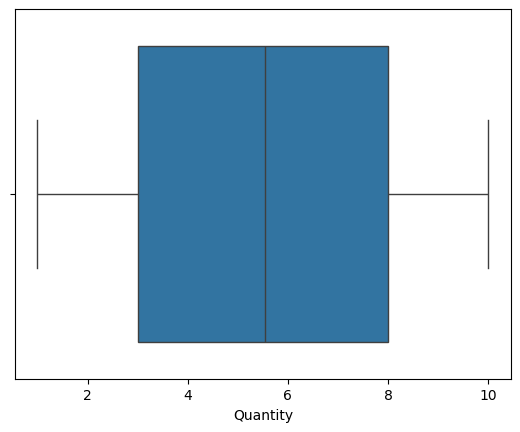

In [83]:
sns.boxplot(data=df, x=df['Quantity'])

<Axes: xlabel='Price Per Unit'>

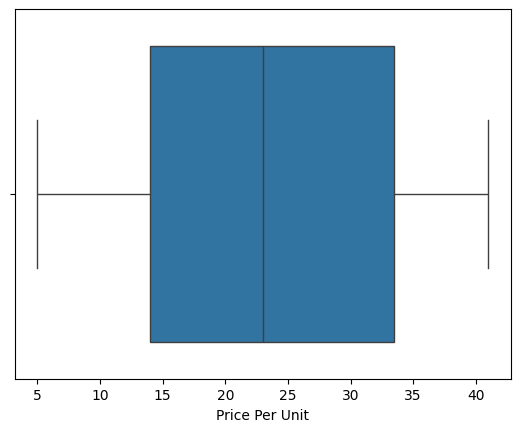

In [84]:
sns.boxplot(data=df, x=df['Price Per Unit'])

<Axes: xlabel='Total Spent'>

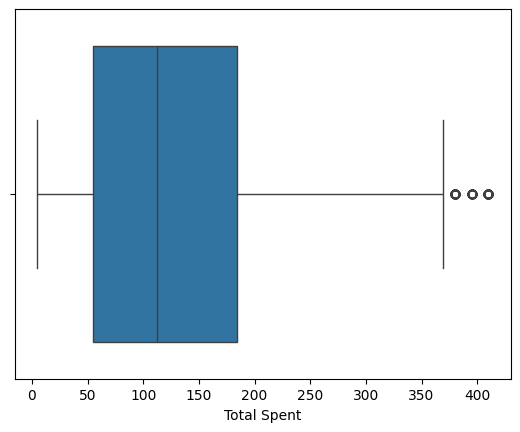

In [85]:
sns.boxplot(data=df, x=df['Total Spent'])

In [86]:
q1 = df['Total Spent'].quantile(0.25)
q3 = df['Total Spent'].quantile(0.75)

iqr = q3 - q1

lower = q1 - iqr * 1.5
upper = q3 + iqr * 1.5

tem = df['Total Spent'].apply(lambda x: x < lower or x > upper)


In [87]:
df = df[~tem]

In [88]:
df.shape

(12418, 11)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12418 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12418 non-null  object        
 1   Customer ID       12418 non-null  object        
 2   Category          12418 non-null  object        
 3   Item              12418 non-null  object        
 4   Price Per Unit    12418 non-null  float64       
 5   Quantity          12418 non-null  float64       
 6   Total Spent       12418 non-null  float64       
 7   Payment Method    12418 non-null  object        
 8   Location          12418 non-null  object        
 9   Transaction Date  12418 non-null  datetime64[ns]
 10  Discount Applied  12418 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(6)
memory usage: 1.1+ MB


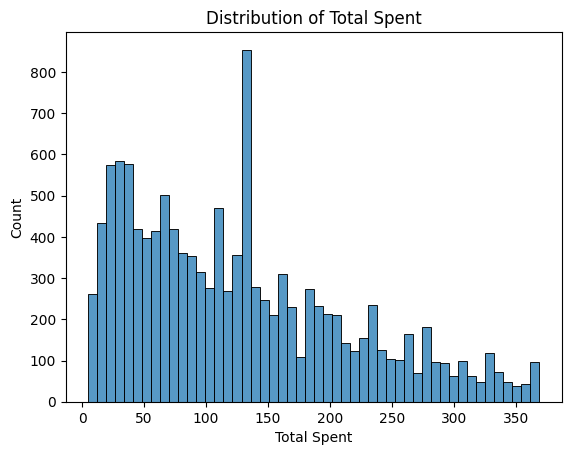

In [92]:
sns.histplot(df['Total Spent'], bins=50)
plt.title('Distribution of Total Spent')
plt.show()

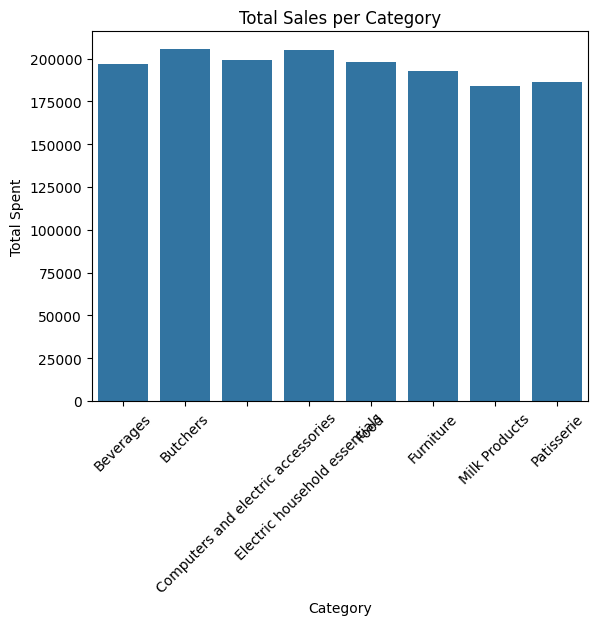

In [93]:
sales_by_cat = df.groupby('Category')['Total Spent'].sum().reset_index()
sns.barplot(data=sales_by_cat, x='Category', y='Total Spent')
plt.xticks(rotation=45)
plt.title('Total Sales per Category')
plt.show()



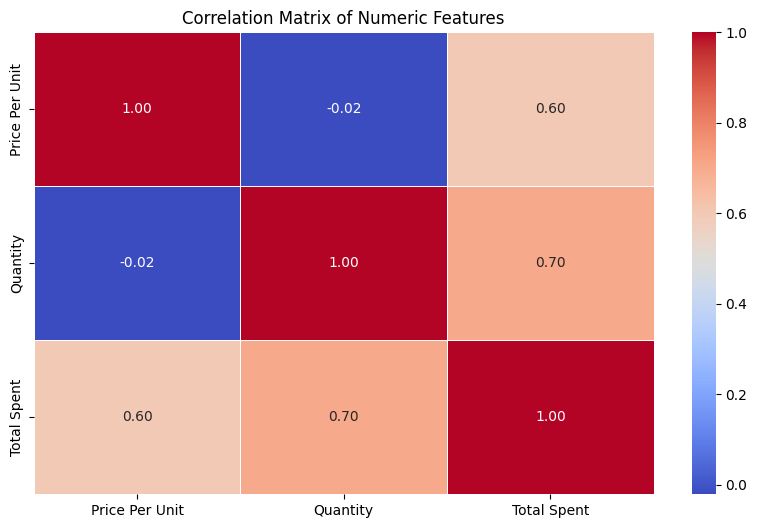

In [97]:
# only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])


plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

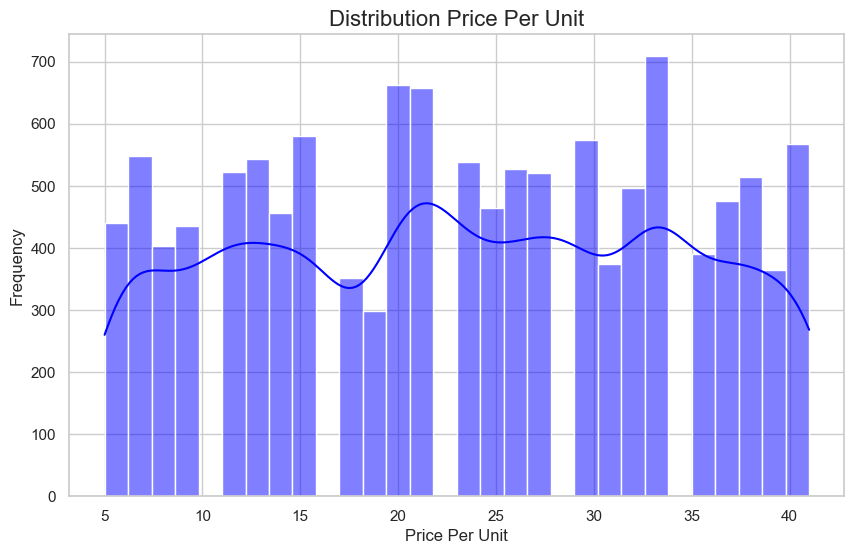

In [103]:
#Distribution Price Per Unit
plt.figure(figsize=(10, 6))
sns.histplot(df['Price Per Unit'], bins=30, kde=True, color='blue')
plt.title('Distribution Price Per Unit', fontsize=16)
plt.xlabel('Price Per Unit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\Guest User\AppData\Local\Temp\ipykernel_38800\3251148815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Discount Applied', palette='viridis', order=df['Discount Applied'].value_counts().index)


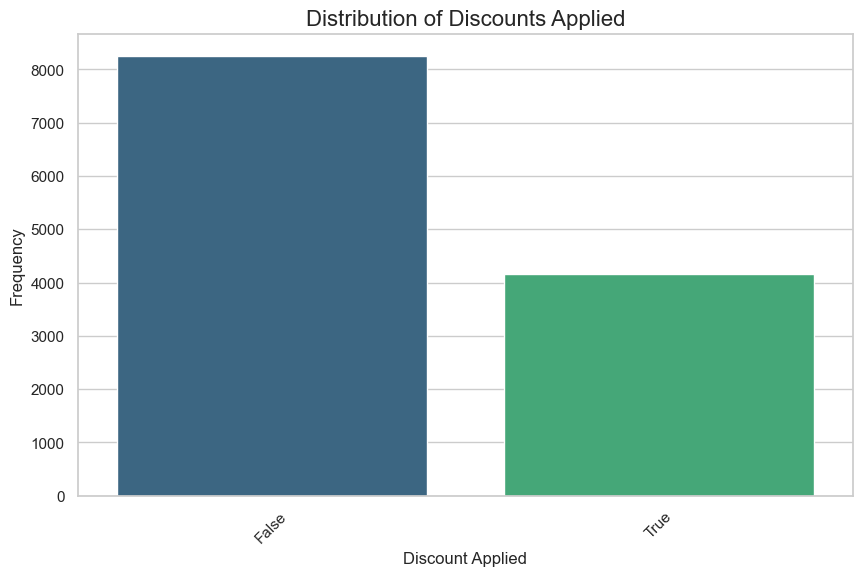

In [102]:
#Distribution of Discounts Applied
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Discount Applied', palette='viridis', order=df['Discount Applied'].value_counts().index)
plt.title('Distribution of Discounts Applied', fontsize=16)
plt.xlabel('Discount Applied', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()